#  SOLVING CALCULUS PROBLEMS
## Derivatives and Integrals

In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

## Finding the Derivative of Functions

The derivative of a function $y = f(x)$ expresses the rate of change in the dependent variable, $y$, with respect to the independent variable, $x$. It’s denoted as either $f′(x)$ or $dy/dx$. We can find the derivative of a function by creating an object of the `Derivative` class. Let’s use the previous function representing the motion of a car as an example:

In [2]:
from sympy import Symbol, Derivative #1
t = Symbol('t')
St = 5*t**2 + 2*t + 8
Derivative(St, t) #2

Derivative(5*t**2 + 2*t + 8, t)

We import the `Derivative` class at (1). At (2), we create an object of the `Derivative` class. The two arguments passed while creating the object are the function `St` and the symbol `t`, which corresponds to the variable $t$. As with the `Limit` class, an object of the `Derivative` class is returned, and the derivative is not actually calculated. We call the `doit()` method on the unevaluated Derivative object to find the derivative:

In [3]:
d = Derivative(St, t)
d.doit()

10*t + 2

The expression for the derivative turns out to be `10*t + 2`. Now, if we want to calculate the value of the derivative at a particular value of $t$—say, $t = t_1$ or $t = 1$—we can use the `subs()` method:

In [4]:
d.doit().subs({t:'t1'})

10*t1 + 2

In [5]:
d.doit().subs({t:1})

12

Let’s try a complicated arbitrary function with x as the only variable: $(x^3 + x^2 + x)\times(x^2 + x)$.

In [6]:
from sympy import Derivative, Symbol
x = Symbol('x')
f = (x**3 + x**2 + x)*(x**2+x)
Derivative(f, x).doit()

(2*x + 1)*(x**3 + x**2 + x) + (x**2 + x)*(3*x**2 + 2*x + 1)

You may consider this function the product of two independent functions, which means that, by hand, we’d need to make use of the *product rule* of differentiation to find the derivative. But we don’t need to worry about that here because we can just create an object of the `Derivative` class to
do that for us. Try out some other complicated expressions, such as expressions involving trigonometric functions.

### *A Derivative Calculator*

Now let’s write a derivative calculator program, which will take a function as input and then print the result of differentiating it with respect to the variable specified:

In [7]:
'''
Derivative calculator
'''
from sympy import Symbol, Derivative, sympify, pprint
from sympy.core.sympify import SympifyError
def derivative(f, var):
    var = Symbol(var)
    d = Derivative(f, var).doit()
    pprint(d)
if __name__=='__main__':
    f = input('Enter a function: ') #1
    var = input('Enter the variable to differentiate with respect to: ')
    try:
        f = sympify(f) #2
    except SympifyError:
        print('Invalid input')
    else:
        derivative(f, var) #3

KeyboardInterrupt: 

At (1), we ask the user to input a function for which the derivative is to be found, and then we ask for the variable with respect to which the function is to be differentiated. At (2), we convert the input function into a `SymPy` object using the `sympify()` function. We call this function in a try...except block so that we can display an error message in case the user enters an invalid input. If the input expression is a valid expression, we call the derivative function at (3), passing the converted expression and the variable with respect to which the function is to be differentiated as arguments.

In the `derivative()` function, we first create a `Symbol` object that corresponds to the variable with respect to which the function is to be differentiated. We use the label var to refer to this variable. Next, we create
a `Derivative` object that passes both the function to differentiate and the `symbol` object var. We immediately call the `doit()` method to evaluate the derivative, and we then use the `pprint()` function to print the result so that it appears close to its mathematical counterpart. A sample execution of the program follows:

`Enter a function: 2*x**2 + 3*x + 1
Enter the variable to differentiate with respect to: x 
4·x + 3`

Here’s a sample run when used with a function of two variables:

`Enter a function: 2*x**2 + y**2
Enter the variable to differentiate with respect to: x
4·x`

### *Calculating Partial Derivatives*

In the previous program, we saw that it’s possible to calculate the derivative of a multivariable function with respect to any variable using the Derivative class. This calculation is usually referred to as *partial differentiation*, with *partial* indicating that we assume only one variable varies while the others are fixed.
Let’s consider the function $f(x, y) = 2xy + xy^2$. The partial differentiation of $f(x, y)$ with respect to $x$ is

$$\frac{\partial f}{\partial x} = 2y + y^2$$

The preceding program is capable of finding the partial derivative because it’s just a matter of specifying the right variable:

`Enter a function: 2*x*y + x*y**2
Enter the variable to differentiate with respect to: x
y2 + 2·y`

**NOTE**
*A key assumption I’ve made in this notebook is that all the functions we’re calculating the derivative of are differentiable in their respective domains.*

## Higher-Order Derivatives and Finding the Maxima and Minima

By default, creating the derivative object using the `Derivative` class finds the first-order derivative. To find higher-order derivatives, simply specify the order of the derivative to calculate as the third argument when you create the `Derivative` object. In this section I will show you how to use the first- and second-order derivative of the function to find its maxima and minima on an interval.


Consider the function $x5 − 30x3 + 50x$, defined on the domain $[−5, 5]$. Note that I have used square brackets to indicate a closed domain, indicating that the variable $x$ can assume any real value greater than or equal to $−5$ and less than or equal to $5$ (see Figure 1-3).

<img src='fig3.png', style='width:450px' />
*Figure 1-3: Plot of the function x5 − 30x3 + 50x, where −5 ≤ x ≤ 5*

From the graph, we can see that the function attains its minimum value on the interval $−2 ≤ x ≤ 0$ at the point $B$. Similarly, it attains its maximum value on the interval $0 ≤ x ≤ 2$ at the point $C$. On the other hand, the function attains its maximum and minimum values on the entire domain of $x$ that we’ve considered here at the points $A$ and $D$, respectively. Thus, when we consider the function on the whole interval $[−5, 5]$, the points $B$ and $C$ are referred to as a *local minimum* and a *local maximum*, respectively, while the points $A$ and $D$ are the *global maximum* and the *global minimum*, respectively.

The term *extremum* (plural extrema) refers to the points where the function attains a local or global maximum or minimum. If $x$ is an extremum of the function $f(x)$, then the first-order derivative of $f$ at $x$, denoted $f′(x)$, must vanish. This property shows that a good way to find possible extrema is to try to solve the equation $f′(x) = 0$. Such solutions are called *critical points* of the function. Let’s try this out:

In [8]:
from sympy import Symbol, solve, Derivative
x = Symbol('x')
f = x**5 - 30*x**3 + 50*x
d1 = Derivative(f, x).doit()

Now that we have calculated the first-order derivative, $f′(x)$, we’ll solve $f′(x) = 0$ to find the critical points:

In [9]:
critical_points = solve(d1)
critical_points

[-sqrt(-sqrt(71) + 9),
 sqrt(-sqrt(71) + 9),
 -sqrt(sqrt(71) + 9),
 sqrt(sqrt(71) + 9)]

The numbers in the list `critical_points` shown here correspond to the points $B, C, A,$ and $D,$ respectively. We will create labels to refer to these points, and then we can use the labels in our commands:

In [10]:
A = critical_points[2]
B = critical_points[0]
C = critical_points[1]
D = critical_points[3]

Because all the critical points for this function lie within the considered interval, they are all relevant for our search for the global maximum and minimum of $f(x)$. We may now apply the so-called *second derivative* test to narrow down which critical points could be global maxima or minima.

First, we calculate the second-order derivative for the function $f(x)$. Note that to do so, we enter `2` as the third argument:

In [11]:
d2 = Derivative(f, x, 2).doit()

Now, we find the value of the second derivative by substituting the value of each of the critical points one by one in place of $x$. If the resulting value is less than $0$, the point is a local maximum; if the value is greater than $0$, it’s a local minimum. If the resulting value is $0$, then the test is inconclusive and we cannot deduce anything about whether the critical point $x$ is a local minimum, maximum, or neither.

In [12]:
d2.subs({x:B}).evalf()

127.661060789073

In [13]:
d2.subs({x:C}).evalf()

-127.661060789073

In [14]:
d2.subs({x:A}).evalf()

-703.493179468151

In [15]:
d2.subs({x:D}).evalf()

703.493179468151

Evaluating the second derivative test at the critical points tells us that the points $A$ and $C$ are local maxima and the points $B$ and $D$ are local minima. 

The global maximum and minimum of $f(x)$ on the interval $[−5, 5]$ is attained either at a critical point $x$ or at one of the endpoints of the domain $(x = −5 and x = 5)$. We have already found all of the critical points, which are the points $A, B, C,$ and $D$. The function cannot attain its global minimum
at either of the critical points $A$ or $C$ because they are local maximums. By similar logic, the function cannot attain its global maximum at $B$ or $D$.


Thus, to find the global maximum, we must compute the value of $f(x)$ at the points $A, C, −5,$ and $5$. Among these points, the place where $f(x)$ has the largest value must be the global maximum.
We will create two labels, `x_min` and `x_max`, to refer to the domain boundaries and evaluate the function at the points `A, C, x_min,` and `x_max`:

In [16]:
x_min = -5
x_max = 5
f.subs({x:A}).evalf()

705.959460380365

In [17]:
f.subs({x:C}).evalf()

25.0846626340294

In [18]:
f.subs({x:x_min}).evalf()

375.000000000000

In [19]:
f.subs({x:x_max}).evalf()

-375.000000000000

By these calculations, as well as by examining the function value at all the critical points and the domain boundaries (Figure 1-3), we see that the point $A$ turns out be the global maximum.
Similarly, to determine the global minimum, we must compute the values of $f(x)$ at the points $B, D, −5,$ and $5$:

In [20]:
f.subs({x:B}).evalf()

-25.0846626340294

In [21]:
f.subs({x:D}).evalf()

-705.959460380365

In [22]:
f.subs({x:x_min}).evalf()

375.000000000000

In [23]:
f.subs({x:x_max}).evalf()

-375.000000000000

The point where $f(x)$ has the smallest value must be the global minimum for the function; this turns out to be point D$.$ This method for finding the extrema of a function—by considering the function’s value at all of the critical points (after potentially discarding some via the second derivative test) and boundary values—will always work as long as the function is twice differentiable. That is, both the first and second derivative must exist everywhere in the domain.

For a function such as $e^x$, there might not be any critical points in the domain, but in this case the method works fine: it simply tells us that the extrema occur at the domain boundary.

## Finding the Global Maximum Using Gradient Ascent

Sometimes we’re just interested in finding the global maximum for a function instead of all the local and global maxima and minima. For example, we might want to discover the angle of projection for which a ball will cover the maximum horizontal distance. We’re going to learn a new, more practical approach to solve such a problem. This approach makes use of the first derivative only, so it’s applicable only to functions for which the first derivative can be calculated.

This method is called the *gradient ascent method*, which is an iterative approach to finding the global maximum. Because the gradient ascent method involves lots of computation, it’s the perfect kind of thing to solve programmatically rather than by hand. Let’s try it out using the example problem of finding the angle of projection. Here is the derived expression

$$t_{flight} = \frac{u sin{\theta}}{g}$$

to calculate the time of flight for a body in projectile motion that’s thrown with a velocity $u$ at an angle $\theta$. The range of a projectile, $R$, is the total horizontal distance traveled by the projectile and is given by the product of $u_x × t_{flight}$. Here, $u_x$ is the horizontal component of the initial velocity and is equal to $u\cos\theta$. Substituting the formulas for $u_x$ and $t_{flight}$, we get the expression

$$R = u\cos\theta \times \frac{2u sin{\theta}}{g} = \frac{u^2 sin{2\theta}}{g}$$

The plot in Figure 1-4 shows values of $\theta$ between $0$ and $90$ degrees and the corresponding range (distance traveled) for each angle. From the graph, we can see that the maximum range is obtained when the angle of projection is around $45$ degrees. We’ll now learn to use the gradient ascent method to find this value of $\theta$ numerically.

<img src='fig7-4.png', style='width:450px' />

*Figure 1-4: The range of a projectile thrown with an initial velocity of 25 m/s with varying angles of projection*

The gradient ascent method is an iterative method: we start with an initial value of $\theta$—say, $0.001$, or $\theta_{old} = 0.001$—and gradually get closer to the value of $\theta$ that corresponds to the maximum range (Figure 1-5). The step that gets us closer is the equation

$$\theta_{new} = \theta_{old} + \lambda\frac{dR}{d\theta}$$

where $\lambda$ is the step size and

$$\frac{dR}{d\theta}$$

is the derivative of R with respect to $\theta$. Once we set $\theta_{old} = 0.001$, we do the following:

1. Calculate θnew using the preceding equation.
2. If the absolute difference $\theta_{new} − \theta_{old}$ is greater than a value, $\epsilon$, we set $\theta_{old} = \theta_{new}$ and return to step 1. Otherwise, we go to step 3.
3. $\theta_{new}$ is an approximate value of $\theta$ for which $R$ has the maximum value.
The value of epsilon ($\epsilon$) determines when we decide to stop the iteration
of the algorithm. It is discussed in “The Role of the Step Size and Epsilon” later.

<img src='fig7-5.png', style='width:450px' />

*Figure 1-5: The gradient ascent method takes us iteratively toward the maximum point of the function.*

The following `grad_ascent()` function implements the gradient ascent algorithm. The parameter `x0` is the initial value of the variable at which to start the iteration, `f1x` is the derivative of the function whose maximum we want to find, and `x` is the `Symbol` object corresponding to the variable for the function.

In [24]:
'''
Use gradient ascent to find the angle at which the projectile
has maximum range for a fixed velocity, 25 m/s
'''
import math
from sympy import Derivative, Symbol, sin
def grad_ascent(x0, f1x, x):
    epsilon = 1e-6 #1
    step_size = 1e-4 #2
    x_old = x0 #3
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf() #4
    while abs(x_old - x_new) > epsilon: #5
               x_old = x_new
               x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new

def find_max_theta(R, theta): #6
    # Calculate the first derivative
    R1theta = Derivative(R, theta).doit()
    theta0 = 1e-3
    theta_max = grad_ascent(theta0, R1theta, theta)
    return theta_max #7
    if __name__ == '__main__':
        g = 9.8
        # Assume initial velocity
        u = 25
        # Expression for range
        theta = Symbol('theta')
        R = u**2*sin(2*theta)/g #8
        theta_max = find_max_theta(R, theta) #9
        print('Theta: {0}'.format(math.degrees(theta_max)))
        print('Maximum Range: {0}'.format(R.subs({theta:theta_max})))

We set the epsilon value to 1e-6 and the step size to 1e-4 at (1) and (2), respectively. The epsilon value must always be a very small positive value close to 0, and the step size should be chosen such that the variable is incremented in small amounts at every iteration of the algorithm. The choice of the value of epsilon and step size is discussed in a bit more detail in “The Role of the Step Size and Epsilon”.
We set `x_old` to `x0` at (3) and calculate `x_new` for the first time at (4). We use the `subs()` method to substitute the value of `x_old` in place of the variable and then use `evalf()` to calculate the numerical value. If the absolute difference `abs(x_old – x_new)` is greater than epsilon, the while loop atykeeps executing, and we keep updating the value of `x_old` and `x_new` as per steps 1 and 2 of the gradient ascent algorithm. Once we’re out of the loop—that is, `abs(x_old – x_new) > epsilon`—we return `x_new`, the variable value corresponding to the maximum function value.

We begin to define the `find_max_theta()` function at (6). In this function, we calculate the first-order derivative of `R`; create a label, `theta0`, and set it to 1e-3; and call the `grad_ascent()` function with these two values as arguments, as well as a third argument, the symbol object theta. Once we get the value of $\theta$ corresponding to the maximum function value (`theta_max`), we return it at (7).

Finally, we create the expression representing the horizontal range at (8), having set the initial velocity, `u = 25`, and the theta `Symbol` object corresponding to the angle $\theta$. Then we call the `find_max_theta()` function with `R` and `theta` at (9).

When you run this program, you should see the following output:

`Theta: 44.99999978475661
Maximum Range: 63.7755102040816`

The value of $\theta$ is printed in degrees and turns out to be close to 45 degrees, as expected. If you change the initial velocity to other values, you’ll see that the angle of projection at which the maximum range is reached is always close to 45 degrees.

### *A Generic Program for Gradient Ascent*

We can modify the preceding program slightly to make a generic program for gradient ascent:

In [25]:
'''
Use gradient ascent to find the maximum value of a
single-variable function
'''
from sympy import Derivative, Symbol, sympify
def grad_ascent(x0, f1x, x):
    epsilon =  1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new
if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var) #1
        d = Derivative(f, var).doit() #2
        var_max = grad_ascent(var0, d, var) #3
        print('{0}: {1}'.format(var.name, var_max))
        print('Maximum value: {0}'.format(f.subs({var:var_max})))

Enter a function in one variable: 25*25*sin(2*theta)/9.8
Enter the variable to differentiate with respect to: theta
Enter the initial value of the variable: 0.001
theta: 0.785360029379083
Maximum value: 63.7755100185965


The function `grad_ascent()` remains the same here. Now, however, the program asks the user to input the function, the variable in the function, and the initial value of the variable, where gradient ascent will begin. Once we’re sure that SymPy can recognize the user’s input, we create a Symbol object corresponding to the variable at (1), find the first derivative with respect to it at (2), and call the `grad_ascent()` function with these three arguments. The maximum value is returned at (3).

Here’s a sample run:

`Enter a function in one variable: 25*25*sin(2*theta)/9.8 
Enter the variable to differentiate with respect to: theta 
Enter the initial value of the variable: 0.001
theta: 0.785360029379083
Maximum value: 63.7755100185965`

The function input here is the same as in our first implementation of gradient ascent, and the value of $\theta$ is printed in radians. Here’s another run of the program, which will find the maximum value for $cosy$:

`Enter a function in one variable: cos(y)
Enter the variable to differentiate with respect to: y 
Enter the initial value of the variable: 0.01
y: 0.00999900001666658
Maximum value: 0.999950010415832`

The program also works correctly for a function such as `cos(y) + k`, where `k` is a constant:

`Enter a function in one variable: cos(y) + k
Enter the variable to differentiate with respect to: y 
Enter the initial value of the variable: 0.01
y: 0.00999900001666658
Maximum value: k + 0.999950010415832`

However, a function such as `cos(ky)` won’t work because its first-order derivative, `kcos(ky)`, still contains `k`, and SymPy doesn’t know anything about its value. Therefore, SymPy can’t perform a key step in the gradient ascent algorithm—namely, the comparison `abs(x_old - x_new) > epsilon`.

### *A Word of Warning About the Initial Value*

The initial value of the variable from which we start the iteration of the gradient ascent method plays a very important role in the algorithm. Consider the function $x5 − 30x3 + 50x$, which we used as an example in Figure 1-3. Let’s find the maximum using our generic gradient ascent program:

`Enter a function in one variable: x**5 - 30*x**3 + 50*x 
Enter the variable to differentiate with respect to: x 
Enter the initial value of the variable: -2
x: -4.17445116397103
Maximum value: 705.959460322318`

The gradient ascent algorithm stops when it finds the *closest peak*, which is not always the global maximum. In this example, when you start from the initial value of −2, it stops at the peak that also corresponds to the global maximum (approximately 706) in the considered domain. To verify this further, let’s try a different initial value:

`Enter a function in one variable: x**5 - 30*x**3 + 50*x 
Enter the variable to differentiate with respect to: x 
Enter the initial value of the variable: 0.5
x: 0.757452532565767
Maximum value: 25.0846622605419`

In this case, the closest peak at which the gradient ascent algorithm stops is not the true global maximum of the function. Figure 1-6 depicts the result of the gradient ascent algorithm for both of these scenarios.

<img src='fig7-6.png', style='width:450px' />
*Figure 1-6: Results of the gradient ascent algorithm with different initial values. Gradient ascent always takes us to the closest peak.*

Thus, when using this method, the initial value must be chosen carefully. Some variations of the algorithm try to address this limitation.

### *The Role of the Step Size and Epsilon*

In the gradient ascent algorithm, the next value for the variable is calculated using the equation

$$\theta_{new} = \theta_{old} + \lambda\frac{dR}{d\theta}$$

where $\lambda$ is the *step size*. The step size determines the distance of the next
step. It should be small to avoid going *over* a peak. That is, if the current value of x is close to the value that corresponds to the maximum value of the function, the next step shouldn’t be beyond the peak. The algorithm will then be unsuccessful. On the other hand, very small values will take longer to calculate. We’ve used a fixed step size of $10^{−3}$, but this may not be the most appropriate value for all functions.

The value of epsilon ($\epsilon$) that determines when we decide to stop the iteration of the algorithm should be a value that’s sufficiently small that we’re convinced the value of $x$ is not changing. We expect the first derivative, $f′(x)$, to be 0 at the maximum point, and ideally the absolute difference $| \theta_{new} − \theta_{new} |$ is $0$ (see step 2 of the gradient ascent algorithm). Due to numerical inaccuracies, however, we mayoldnot exactly get a difference of 0; hence, the value of epsilon is chosen to be a value close to 0, which, for all practical purposes, would tell us that the value of $x$ isn’t changing anymore. I have used $10^{−6}$ as the epsilon for all the functions. This value, although sufficiently small and suitable for the functions that have a solution for
$f′(x) = 0$, such as $sin(x)$, may not be the right value for other functions. Thus, it’s a good idea to verify the maximum value at the end to ensure its correctness and, if needed, to adjust the value for epsilon accordingly.

Step 2 of the gradient ascent algorithm also implies that for the algorithm to terminate, the equation $f′(x) = 0$ must have a solution, which isn’t the case for a function such as ex or $log(x)$. If you provide one of these functions as input to the preceding program, therefore, the program won’t give you a solution, and it will continue running. We can make the gradient ascent program more useful for such cases by incorporating a check for whether $f′(x) = 0$ has a solution. Here’s the modified program:

In [26]:
'''
Use gradient ascent to find the maximum value of a single-variable function.
This also checks for the existence of a solution for the equation f'(x)=0.
'''
from sympy import Derivative, Symbol, sympify, solve

def grad_ascent(x0, f1x, x):
# Check if f1x=0 has a solution
    if not solve(f1x): #1
        print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
        return
    epsilon = 1e-6
    step_size = 1e-4
    x_old = x0
    x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    while abs(x_old - x_new) > epsilon:
        x_old = x_new
        x_new = x_old + step_size*f1x.subs({x:x_old}).evalf()
    return x_new

if __name__ == '__main__':
    f = input('Enter a function in one variable: ')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_max = grad_ascent(var0, d, var) 
        if var_max:
            print('{0}: {1}'.format(var.name, var_max))
            print('Maximum value: {0}'.format(f.subs({var:var_max})))

Enter a function in one variable: log(x)
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 0.1
Cannot continue, solution for 1/x=0 does not exist


In this modification of the `grad_ascent()` function, we call SymPy’s `solve()` function at (1) to determine whether the equation $f′(x) = 0$, here `f1x`, has a solution. If not, we print a message and return. Another modification appears in the `__main__` block at (2). We check whether the `grad_ascent()` function successfully returned a result; if it did, then we proceed to print the maximum value of the function and the corresponding value of the variable.
These changes let the program handle functions such as $log(x)$ and $e^x$:

`Enter a function in one variable: log(x)
Enter the variable to differentiate with respect to: x 
Enter the initial value of the variable: 0.1
Cannot continue, solution for 1/x=0 does not exist`

You will see the same for $e^x$.

---
**GRADIENT DESCENT ALGORITHM**

The reverse algorithm of the gradient ascent algorithm is the gradient descent algorithm, which is a method to find the minimum value of a function. It is similar to the gradient ascent algorithm, but instead of “climbing up” along the function, we “climb down.” Challenge #2  discusses the difference between these two algorithms and gives you an opportunity to implement the reverse one.

---

## Finding the Integrals of Functions

The *indefinite integral*, or the *antiderivative*, of a function $f(x)$ is another function $F(x)$, such that $F′(x) = f(x)$. That is, the integral of a function is another function whose derivative is the original function. Mathematically, it’s written as $F(x) = \int f(x)dx$. The *definite integral*, on the other hand, is the integral

$$\int^{b}_{a} f(x)dx$$

which is really $F(b) − F(a)$, where $F(b)$ and $F(a)$ are the values of the antiderivative of the function at $x = b$ and at $x = a$, respectively. We can find both the integrals by creating an `Integral` object.

Here’s how we can find the integral $\int kx dx$ where $k$ is a constant term:

In [27]:
from sympy import Integral, Symbol
x = Symbol('x')
k = Symbol('k')
Integral(k*x, x)

Integral(k*x, x)

We import the `Integral` and `Symbol` classes and create two `Symbol` objects corresponding to `k` and `x`. Then, we create an `Integral` object with the function `kx`, specifying the variable to integrate with respect to `x`. Similar to `Limit` and `Derivative` classes, we can now evaluate the integral using the `doit()` method:

In [28]:
Integral(k*x, x).doit()

k*x**2/2

The integral turns out to be $kx^2/2$. If you calculate the derivative of $kx^2/2$, you’ll get back the original function, $kx$. To find the definite integral, we simply specify the variable, the lower limit, and the upper limit as a tuple when we create the `Integral` object:

In [29]:
Integral(k*x, (x, 0, 2)).doit()

2*k

The result returned is the definite integral

$$\int^{2}_{0} kx dx$$

It can be useful to visualize definite integrals by discussing them in a geometric context. Consider Figure 1-7, which shows the graph of the function $f(x) = x$ between $x = 0$ and $x = 5$.

Now consider the region under the graph $ABDE$, which is bounded by the $x-axis$, between the points $x = 2$ and $x = 4$—points $A$ and $B$, respectively. The area of the region can be found by adding the area of the square $ABCE$ and the right-angled triangle $ECD$, which is $2 \times 2 + (1/2) \times 2 \times 2 = 6$.

<img src='fig7-7.png', style='width:450px' />
*Figure 1-7: The definite integral of a function between two points is the area enclosed by the graph of the function bounded by the x-axis.*

Let’s now calculate the integral  $\int^{4}_{2} kx dx$:

In [30]:
from sympy import Integral, Symbol
x = Symbol('x')
Integral(x, (x, 2, 4)).doit()

6

The value of the integral turns out to be the same as the area of the region $ABDE$. This isn’t a coincidence; you’ll find this is true for any function of $x$ for which the integral can be determined. Understanding that the definite integral is the area enclosed by the function between specified points on the $x$-axis is key for understanding probability calculations in random events that involve continuous random variables.

## Probability Density Functions

Let’s consider a fictional class of students and their grades on a math quiz. Each student can earn a grade between 0 and 20, including fractional grades. If we treat the grade as a random event, the grade itself is a *continuous random variable* because it can have any value between 0 and 20. If we want to calculate the probability of a student getting a grade between 11 and 12, we can’t apply a simplistic approach to probability. To see why, let’s consider the formula, assuming uniform probability,

$$P(11 < x < 12) = \frac{n(E)}{n(S)}$$

where $E$ is the set of all grades possible between 11 and 12 and $S$ is the set of all possible grades—that is, all real numbers between 1 and 20. By our definition of the preceding problem, $n(E)$ is infinite because it’s impossible to count all possible real numbers between 11 and 12; the same is true for $n(S)$. Thus, we need a different approach to calculate the probability.

A probability density function, $P(x)$, expresses the probability of the value of a random variable being close to $x$, an arbitrary value. It can also tell us the probability of $x$ falling within an interval. That is, if we knew the probability density function representing the probability of grades in our fictional class, calculating $P(11 < x < 12)$ would give us the probability that we’re looking for. But how do we calculate this? It turns out that this probability is the area enclosed by the graph of the probability density function and the $x$-axis between the points $x = 11$ and $x = 12$. Assuming an arbitrary probability density function, Figure 1-8 demonstrates this.

<img src='fig7-8.png' style='width:450px' />
*Figure 1-8: A probability density function for grades on a math quiz*

We already know that this area is equal to the value of the integral,

$$\int_{11}^{12} p(x) dx;$$

thus, we have an easy way to find the probability of the grade lying between 11 and 12. With the math out of the way, we can now find out what the probability is. The probability density function we assumed earlier is the function

$$\frac{1}{\sqrt{2\pi}}e^{-\frac{(x-10)^2}{2}},$$

where $x$ is the grade obtained. This function has been chosen so that the probability of the grade being close to 10 (either greater or less than) is high but then decreases sharply. Now, let’s calculate the integral

$$\int_{11}^{12} p(x) dx,$$
with $p(x)$ being the preceding function:

In [31]:
from sympy import Symbol, exp, sqrt, pi, Integral
x = Symbol('x')
p = exp(-(x - 10)**2/2)/sqrt(2*pi)
Integral(p, (x, 11, 12)).doit().evalf()

0.135905121983278

We create the `Integral` object for the function, with `p` representing the probability density function that specifies that we want to calculate the definite integral between 11 and 12 on the $x$-axis. We evaluate the function using `doit()` and find the numerical value using `evalf()`. Thus, the probability that a grade lies between 11 and 12 is close to 0.14.

---
**THE PROBABILITY DENSITY FUNCTION: A CAVEAT**

Strictly speaking, this density function assigns a nonzero probability to grades less than 0 or greater than 20. However, as you can check using the ideas from this section, the probability of such an event is so small that it is negligible for our purposes.

---

A probability density function has two special properties: (1) the function value for any x is always greater than 0, as probability can’t be less than 0, and (2) the value of the definite integral

$$\int_{-\infty}^{\infty} f(x) dx$$

is equal to 1. The second property merits some discussion. Because $p(x)$ is a probability density function, the area enclosed by it, which is also the integral

$$\int_{a}^{b} p(x) dx,$$

between any two points, $x = a$ and $x = b$, gives us the probability of $x$ lying between $x = a$ and $x = b$. This also means that no matter what the values of $a$ and $b$ are, the value of the integral must not exceed 1 because the probability can’t be greater than 1 by definition. Hence, even if $a$ and $b$ are very large values such that they tend to $-\infty$ and $\infty$, respectively, the value of the integral will still be 1, as we can verify ourselves:

In [32]:
from sympy import Symbol, exp, sqrt, pi, Integral, S
x = Symbol('x')
p = exp(-(x-10)**2/2)/sqrt(2*pi)
Integral(p, (x, S.NegativeInfinity, S.Infinity)).doit().evalf()

1.00000000000000

`S.NegativeInfinity` and `S.Infinity` denote the negative and positive infinity that we then specify as the lower and upper limits, respectively, while creating the Integral object.

When we’re dealing with continuous random variables, a tricky situation can arise. In discrete probability, the probability of an event such as a fair six-sided die rolling a 7 is 0. We call an event for which the probability is 0 an *impossible* event. In the case of continuous random variables, the probability of the variable assuming any exact value is 0, even though it may be a *possible* event. For example, the grade of a student being exactly 11.5 is possile, but due to the nature of continuous random variables, the probability is 0. To see why, consider that the probability will be the value of the integral

$$\int_{11.5}^{11.5} p(x) dx$$

Because this integral has the same lower and upper limits, its value is 0. This is rather unintuitive and paradoxical, so let’s try to understand it.

Consider the range of grades we addressed earlier—0 to 20. The grade a student can obtain can be any number in this interval, which means there is an infinite number of numbers. If each number were to have an equal probability of being selected, what would that probability be? According
to the formula for discrete probability, this should be $1/\infty$, which means a very small number. In fact, this number is so small that for all practical purposes, it’s considered 0. Hence, the probability of the grade being 11.5 is 0.

## What You Learned

In this notebook, you learned how to find the limits, derivatives, and integrals of functions. You learned about the gradient ascent method for finding the maximum value of a function and saw how you can apply integration principles to calculate the probability of continuous random variables. Next, you have a few tasks to attempt.

#  Programming Challenges

The following challenges build on what you’ve learned in this notebook. You can find solutions in the Solutions notebook.

## #2: Implement the Gradient Descent

The gradient descent method is used to find the minimum value of a function. Similar to the gradient ascent method, the gradient descent method is an iterative method: we start with an initial value of the variable and gradually get closer to the variable value that corresponds to the minimum value of the function. The step that gets us closer is the equation

$$x_{new} = x_{old} - \lambda \frac{df}{dx}$$

where $\lambda$ is the step size and

$$\frac{df}{dx}$$

is the result of differentiating the function. Thus, the only difference from the gradient ascent method is how we obtain the value of `x_new` from `x_old`. 

Your challenge is to implement a generic program using the gradient descent algorithm to find the minimum value of a single-variable function specified as input by the user. The program should also create a graph of the function and show all the intermediate values it found before finding the minimum.

Enter a function in one variable:3*x**2 + 2*x
Enter the variable to differentiate with respect to: x
Enter the initial value of the variable: 0.1
x: -0.331668643986980
Minimum value: -0.333325019761474


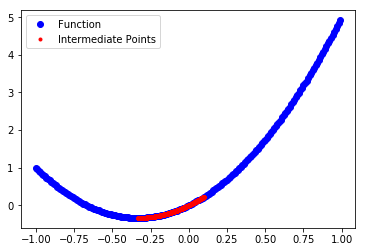

In [21]:
from sympy import Derivative, Symbol, sympify, solve
import matplotlib.pyplot as plt

def grad_descent(x0, f1x, x):
    if not solve(f1x):
        print('Cannot continue, solution for {0}=0 does not exist'.format(f1x))
        return None
    
    epsilon = 1e-6
    step_size = 1e-4
    
    x_old = x0
    x_new = x_old - step_size * f1x.subs({ x : x_old}).evalf()
    
    X_traversed = []
    
    while abs(x_old - x_new) > epsilon:
        X_traversed.append(x_new)
        x_old = x_new
        x_new = x_old - step_size * f1x.subs({ x : x_old}).evalf()
        
    return x_new, X_traversed
    
def frange(start, final, interval):
    numbers = []
    while start < final:
        numbers.append(start)
        start = start + interval
    return numbers
    
def create_plot(X_traversed, f, var):
    x_val = frange(-1, 1, 0.01)
    f_val = [f.subs({ var: x }) for x in x_val]
    plt.plot(x_val, f_val, 'bo')
    
    f_traversed = [f.subs({ var: x }) for x in X_traversed]
    plt.plot(X_traversed, f_traversed, 'r.')
    plt.legend(['Function', 'Intermediate Points'], loc='best')
    plt.show()
    
    
if __name__ == '__main__':
    f = input('Enter a function in one variable:')
    var = input('Enter the variable to differentiate with respect to: ')
    var0 = float(input('Enter the initial value of the variable: '))
    
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        d = Derivative(f, var).doit()
        var_min, X_traversed = grad_descent(var0, d, var)
        
        if var_min:
            print('{0}: {1}'.format(var.name, var_min))
            print('Minimum value: {0}'.format(f.subs({ var:var_min})))
        
        create_plot(X_traversed, f, var)

## #3: Area Between Two Curves

We learned that the integral

$$\int_{a}^{b} f(x) dx$$

expresses the area enclosed by the function $f(x)$, with the x-axis between $x = a$ and $x = b$. The area between two curves is thus expressed as the integral

$$\int_{a}^{b} (f(x)-g(x)) dx$$

where $a$ and $b$ are the points of intersection of the two curves with $a < b$. The function $f(x)$ is referred to as the *upper function* and $g(x)$ as the *lower function*. Figure 1-9 illustrates this, assuming $f(x) = x$ and $g(x) = x^2$, with a = 0 and b = 1.

Your challenge here is to write a program that will allow the user to input any two single-variable functions of $x$ and print the enclosed area between the two. The program should make it clear that the first function entered should be the upper function, and it should also ask for the values of $x$ between which to find the area.

<img src='fig7-9.png' style='width:450px' />

*Figure 1-9: The functions f(x) = x and g(x) = x2 enclose an area between x = 0 and x = 1.0.*

In [23]:
from sympy import Integral, Symbol, SympifyError, sympify

def find_area(f, g, var, a, b):
    a = Integral(f-g, (var, a, b)).doit()
    return a
    


if __name__ == '__main__':
    f = input('Enter the upper function in one variable:')
    g = input('Enter the lower function in one variable:')
    var = input('Enter the variable: ')
    l = float(input('Enter the lower bound of the enclosed region: '))
    u = float(input('Enter the upper bound of the enclosed region: '))
    
    try:
        f = sympify(f)
        g = sympify(g)
    except SympifyError:
        print('One of the functions is invalid')
    else:
        var = Symbol(var)
        print('Area enclosed by {0} and {1} is: {2}'.format(f, g, find_area(f, g, var, l, u)))

Enter the upper function in one variable:x+1
Enter the lower function in one variable:x*exp(-x**2)
Enter the variable: x
Enter the lower bound of the enclosed region: 0
Enter the upper bound of the enclosed region: 2
Area enclosed by x + 1 and x*exp(-x**2) is: 3.50915781944437


## #4: Finding the Length of a Curve

Let’s say you just completed cycling along a road that looks roughly like Figure 1-10. Because you didn’t have an odometer, you want to know whether there’s a mathematical way to determine the distance you cycled. First, we’ll need to find an equation—even an approximation will do—that describes this path.

<img src='fig7-10.png' style='width:450px' />

*Figure 1-10: An approximation of the cycling path*

Notice how it looks very similar to the quadratic functions you learned about in algebra? In fact, for this challenge, let’s assume that the equation is $y=f(x)=2x^2 +3x + 1$ and that you cycled from point $A (−5, 36)$ to point $B (10, 231)$. To find the length of this arc—that is, the distance you cycled—we’ll need to calculate the integral

$$\int_{a}^{b}\sqrt{1+\left(\frac{dy}{dx}\right)^2} dx,$$

where $y$ describes the preceding function. Your challenge here is to write a program that will calculate the length of the arc, $AB$. You may also want to generalize your solution so that it allows you to find the length of the arc between any two points for any arbitrary function, $f(x)$.

In [25]:
from sympy import Derivative, Integral, Symbol, sqrt, SympifyError, sympify

def find_length(fx, var, a, b):
    deriv = Derivative(fx, var).doit()
    length = Integral(sqrt(1 + deriv**2), (var, a, b)).doit().evalf()
    return length


if __name__ == '__main__':
    f = input('Enter the function in one variable:')
    var = input('Enter the variable: ')
    l = float(input('Enter the lower limit of the variable: '))
    u = float(input('Enter the upper limit of the variable: '))
    
    try:
        f = sympify(f)
    except SympifyError:
        print('Invalid function entered')
    else:
        var = Symbol(var)
        print('Length of {0} between {1} and {2} is: {3}'.format(f, l, u, find_length(f, var, l, u)))

Enter the function in one variable:2*x**2 + 3*x - 1
Enter the variable: x
Enter the lower limit of the variable: -5
Enter the upper limit of the variable: 10
Length of 2*x**2 + 3*x - 1 between -5.0 and 10.0 is: 268.372650946022
